In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import seaborn as sns

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.feature_extraction.text import CountVectorizer
import re
from IPython.display import Image
df=pd.read_csv('/kaggle/input/identifying-healthcare/Doceree-HCP_Train.csv',encoding = "ISO-8859-1")
df.set_index('ID', inplace=True)
df


,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,
1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0


In [58]:
#pip install sweetviz

In [59]:
#pip install lazypredict

In [60]:
#import sweetviz as sw
#report=sw.analyze(df)
#report.show_html('report.html',open_browser=True)

In [61]:
#df.info()

In [62]:
'''for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())'''

'for i in df.columns:\n    print(i)\n    print(df[i].unique())\n    print(df[i].value_counts())'

In [63]:
df.drop(['CHANNELTYPE','USERZIPCODE','USERPLATFORMUID','BIDREQUESTIP'],inplace=True,axis=1)

In [64]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
df['URL']=df['URL'].str.split("www.").str[1].str.split('.com').str[0]
df['URL']

ID
1001      cancertherapyadvisor
1002      cancertherapyadvisor
1003      cancertherapyadvisor
1004                       NaN
1005                    cureus
                  ...         
114933         clinicaladvisor
114934         clinicaladvisor
114935                  cureus
114936      dermatologyadvisor
114937              medicalbag
Name: URL, Length: 113937, dtype: object

In [66]:
df['URL'].value_counts()

cureus                      20913
clinicaladvisor             15529
cancertherapyadvisor        10381
empr                         9182
rheumatologyadvisor          6786
renalandurologynews          6480
gastroenterologyadvisor      5925
2minutemedicine              3891
dermatologyadvisor           3705
neurologyadvisor             3579
goodrx                       2978
psychiatryadvisor            2923
pulmonologyadvisor           2880
clinicalpainadvisor          2751
medicalbag                   2332
rarediseaseadvisor           1535
thecardiologyadvisor         1380
infectiousdiseaseadvisor     1124
grantsformedical             1037
endocrinologyadvisor          846
oncologynurseadvisor          704
hematologyadvisor             653
ophthalmologyadvisor          428
h2hdigitalrx                   40
epainassist                    32
optometryadvisor               20
fpnotebook                     16
Name: URL, dtype: int64

In [67]:
vectorizer1 = CountVectorizer()
vectorizer1.fit(df['KEYWORDS'])
token_counts=vectorizer1.transform(df['KEYWORDS'])
word_counts = token_counts.toarray().sum(axis=0)
feature_names = vectorizer1.get_feature_names_out()
counts_with_words= dict(zip(feature_names, word_counts))
print(token_counts.toarray().shape)

(113937, 1246)


In [68]:
w=pd.DataFrame(token_counts.toarray(),index=[i for i in range(1001,114938)],columns=feature_names)
df=pd.concat([df,w],axis=1)
df

,DEVICETYPE,PLATFORM_ID,USERCITY,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,19,...,with,withdrawal,wound,xa,yaws,yellow,york,zoonoses,zostavax,zoster
1001,Desktop,2,Portland,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,cancertherapyadvisor,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1002,Desktop,2,Arlington,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cancertherapyadvisor,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1003,Desktop,2,New Meadows,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cancertherapyadvisor,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1004,Desktop,3,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,NaN,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1005,Mobile,7,Houston,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,cureus,Critical Care|Emergency Medicine|General Pract...,NaN,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,Desktop,2,Philadelphia,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,clinicaladvisor,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0,0,...,0,0,0,0,0,0,0,0,0,0
114934,Desktop,2,Van Nuys,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,clinicaladvisor,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0,0,...,0,0,0,0,0,0,0,0,0,0
114935,Desktop,7,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cureus,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0,0,...,0,0,0,0,0,0,0,0,0,0
114936,Mobile,2,Wilmington,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,dermatologyadvisor,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#df.columns

In [70]:
#dict(df['USERAGENT'].value_counts())                  # r'(Mozilla|AppleWebKit|Version|Mobile|Safari|Edg|Chrome|CriOS|Firefox|GSA|SamsungBrowser|Gecko)'

In [71]:
#d1 = df['USERAGENT'].str.extract(r'^(.*?)\/')

In [72]:
#d = df['USERAGENT'].str.findall(r'\) (.*?)\/')


In [73]:
'\[0-9] .*?\[0-9]'

'\\[0-9] .*?\\[0-9]'

In [74]:
df['BROWSER']=df['USERAGENT'].str.findall(r'(Mozilla|AppleWebKit|Version|Mobile|Safari|Edg|Chrome|CriOS|Firefox|GSA|SamsungBrowser|Gecko)')
df.BROWSER

1001          [Mozilla, AppleWebKit, Gecko, Chrome, Safari]
1002         [Mozilla, AppleWebKit, Gecko, Version, Safari]
1003         [Mozilla, AppleWebKit, Gecko, Version, Safari]
1004      [Mozilla, AppleWebKit, Gecko, Chrome, Safari, ...
1005      [Mozilla, AppleWebKit, Gecko, Version, Mobile,...
                                ...                        
114933       [Mozilla, AppleWebKit, Gecko, Version, Safari]
114934        [Mozilla, AppleWebKit, Gecko, Chrome, Safari]
114935        [Mozilla, AppleWebKit, Gecko, Chrome, Safari]
114936    [Mozilla, AppleWebKit, Gecko, Version, Mobile,...
114937    [Mozilla, AppleWebKit, Gecko, Version, Mobile,...
Name: BROWSER, Length: 113937, dtype: object

In [75]:
df['BROWSER']=df['BROWSER'].str.join(' ')
df['BROWSER']

1001              Mozilla AppleWebKit Gecko Chrome Safari
1002             Mozilla AppleWebKit Gecko Version Safari
1003             Mozilla AppleWebKit Gecko Version Safari
1004          Mozilla AppleWebKit Gecko Chrome Safari Edg
1005      Mozilla AppleWebKit Gecko Version Mobile Safari
                               ...                       
114933           Mozilla AppleWebKit Gecko Version Safari
114934            Mozilla AppleWebKit Gecko Chrome Safari
114935            Mozilla AppleWebKit Gecko Chrome Safari
114936    Mozilla AppleWebKit Gecko Version Mobile Safari
114937    Mozilla AppleWebKit Gecko Version Mobile Safari
Name: BROWSER, Length: 113937, dtype: object

In [76]:
df.BROWSER=np.where(df['BROWSER'].isna(),' ',df['BROWSER'])
#df['BROWSER'].unique()

In [77]:
df.BROWSER.isna().sum()

0

In [78]:
vectorizer2=CountVectorizer()
vectorizer2.fit(df['BROWSER'])
token_counts=vectorizer2.transform(df['BROWSER'])
word_counts = token_counts.toarray().sum(axis=0)
feature_names = vectorizer2.get_feature_names_out()
n=len(feature_names)
print(n)
counts_with_words= dict(zip(feature_names, word_counts))
print(counts_with_words)
print(token_counts.toarray().shape)
w=pd.DataFrame(token_counts.toarray(),index=[i for i in range(1001,114938)],columns=feature_names)
df=pd.concat([df,w],axis=1)
df

12
{'applewebkit': 109211, 'chrome': 69330, 'crios': 2545, 'edg': 10687, 'firefox': 4680, 'gecko': 113891, 'gsa': 2904, 'mobile': 36372, 'mozilla': 113900, 'safari': 105901, 'samsungbrowser': 787, 'version': 31370}
(113937, 12)


,DEVICETYPE,PLATFORM_ID,USERCITY,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,19,...,crios,edg,firefox,gecko,gsa,mobile,mozilla,safari,samsungbrowser,version
1001,Desktop,2,Portland,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,cancertherapyadvisor,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,0,...,0,0,0,1,0,0,1,1,0,0
1002,Desktop,2,Arlington,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cancertherapyadvisor,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0,0,...,0,0,0,1,0,0,1,1,0,1
1003,Desktop,2,New Meadows,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cancertherapyadvisor,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,0,...,0,0,0,1,0,0,1,1,0,1
1004,Desktop,3,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,NaN,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0,0,...,0,1,0,1,0,0,1,1,0,0
1005,Mobile,7,Houston,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,cureus,Critical Care|Emergency Medicine|General Pract...,NaN,0.0,0,...,0,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,Desktop,2,Philadelphia,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,clinicaladvisor,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0,0,...,0,0,0,1,0,0,1,1,0,1
114934,Desktop,2,Van Nuys,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,clinicaladvisor,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0,0,...,0,0,0,1,0,0,1,1,0,0
114935,Desktop,7,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,cureus,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0,0,...,0,0,0,1,0,0,1,1,0,0
114936,Mobile,2,Wilmington,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,dermatologyadvisor,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0,0,...,0,0,0,1,0,1,1,1,0,1


In [79]:
df['PLATFORM_ID']=df['PLATFORM_ID'].astype('str')

In [80]:
df.drop(['USERAGENT','KEYWORDS'],inplace=True,axis=1)


In [81]:
df.columns=df.columns.astype('str')

In [82]:
#df=df.drop('TAXONOMY',axis=1)
#df.dropna(axis=1)
#df.shape

In [83]:
#df=df[df.isna().sum()==0 ]
df.IS_HCP.fillna(0)

1001      0.0
1002      0.0
1003      0.0
1004      1.0
1005      0.0
         ... 
114933    1.0
114934    1.0
114935    1.0
114936    1.0
114937    1.0
Name: IS_HCP, Length: 113937, dtype: float64

In [84]:

'''df.IS_HCP=np.where(df.IS_HCP.isna(),0,df.IS_HCP)
df.TAXONOMY=np.where(df.TAXONOMY.isna(),'No',df.TAXONOMY)
#df['TAXONOMY'] = 'S' + df['TAXONOMY'].astype(str)
df.IS_HCP.isna().sum()
df['TAXONOMY']'''

"df.IS_HCP=np.where(df.IS_HCP.isna(),0,df.IS_HCP)\ndf.TAXONOMY=np.where(df.TAXONOMY.isna(),'No',df.TAXONOMY)\n#df['TAXONOMY'] = 'S' + df['TAXONOMY'].astype(str)\ndf.IS_HCP.isna().sum()\ndf['TAXONOMY']"

In [85]:
df.TAXONOMY.isna().sum()

81624

In [86]:
class_0,class_1=df.IS_HCP.value_counts()
df0=df[df.IS_HCP == 0]
df1=df[df.IS_HCP ==1]
# Oversample 1-class and concat the DataFrames of both classes
df1_over = df1.sample(class_0, replace=True)
df = pd.concat([df0, df1_over], axis=0)

In [87]:
'''plt.subplots(figsize=(15,7))
ax=sns.countplot(data=df,x='DEVICETYPE',hue='IS_HCP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()'''


"plt.subplots(figsize=(15,7))\nax=sns.countplot(data=df,x='DEVICETYPE',hue='IS_HCP')\nax.set_xticklabels(ax.get_xticklabels(),rotation=90)\nplt.show()"

In [88]:
SEED = 42
TARGET = ['TAXONOMY','IS_HCP']
#TARGET = ['IS_HCP']
FEATURES = df.columns.drop(['IS_HCP','TAXONOMY'])

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(NUMERICAL)
#print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = df[FEATURES].select_dtypes('object').columns # pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(CATEGORICAL)
#print(f"Categorical features: {', '.join(CATEGORICAL)}")

Index(['19', 'abatacept', 'ablation', 'abnormalities', 'abortion', 'abscess',
       'acanthamoeba', 'accident', 'accidents', 'acetaminophen',
       ...
       'crios', 'edg', 'firefox', 'gecko', 'gsa', 'mobile', 'mozilla',
       'safari', 'samsungbrowser', 'version'],
      dtype='object', length=1258)
Index(['DEVICETYPE', 'PLATFORM_ID', 'USERCITY', 'PLATFORMTYPE', 'URL',
       'BROWSER'],
      dtype='object')


In [89]:
df.TAXONOMY.isna().sum()

84184

In [90]:
df.IS_HCP.value_counts()

0.0    79756
1.0    79756
Name: IS_HCP, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold


In [92]:
X=df.drop(TARGET,axis=1)
y=df[TARGET]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [94]:
#import lazypredict
#from lazypredict.Supervised import LazyClassifier
#from sklearn.metrics import accuracy_score
#clf=LazyClassifier(verbose=1,predictions=True,ignore_warnings=False)
'''models,predictions=clf.fit(X_train,X_test,y_train,y_test)
print(models)
    for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")'''

numerical_pipe = Pipeline([
    #('imputer',IterativeImputer()),
    ('imputer1', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    #('pca',PCA(n_components=5))
])

categorical_pipe = Pipeline([

    ('imputer1', SimpleImputer(strategy='most_frequent', fill_value=np.NaN)),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)

])


In [95]:

model1 = RandomForestClassifier()
model2 = LGBMClassifier()
model3 = XGBClassifier()
model4 = ExtraTreesClassifier()
model5 = AdaBoostClassifier()
model6 = GradientBoostingClassifier()
model7 = HistGradientBoostingClassifier()
model8 = MLPClassifier(hidden_layer_sizes=(32,64,128),batch_size=613,max_iter=500)
model9 = BaggingClassifier()
model10 = CatBoostClassifier()


In [96]:
'''from sklearn.calibration import CalibratedClassifierCV
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
model1 = CalibratedClassifierCV(model1, method='sigmoid',cv=cv)
model2 = CalibratedClassifierCV(model2, method='sigmoid',cv=cv)
model3 = CalibratedClassifierCV(model3, method='sigmoid',cv=cv)
model4 = CalibratedClassifierCV(model4, method='sigmoid',cv=cv)
model5 = CalibratedClassifierCV(model5, method='sigmoid',cv=cv)
model6 = CalibratedClassifierCV(model6, method='sigmoid',cv=cv)
model7 = CalibratedClassifierCV(model7, method='sigmoid',cv=cv)
model8 = CalibratedClassifierCV(model8, method='sigmoid',cv=cv)'''




"from sklearn.calibration import CalibratedClassifierCV\ncv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)\nmodel1 = CalibratedClassifierCV(model1, method='sigmoid',cv=cv)\nmodel2 = CalibratedClassifierCV(model2, method='sigmoid',cv=cv)\nmodel3 = CalibratedClassifierCV(model3, method='sigmoid',cv=cv)\nmodel4 = CalibratedClassifierCV(model4, method='sigmoid',cv=cv)\nmodel5 = CalibratedClassifierCV(model5, method='sigmoid',cv=cv)\nmodel6 = CalibratedClassifierCV(model6, method='sigmoid',cv=cv)\nmodel7 = CalibratedClassifierCV(model7, method='sigmoid',cv=cv)\nmodel8 = CalibratedClassifierCV(model8, method='sigmoid',cv=cv)"

In [97]:

vc = VotingClassifier(estimators=[
   ('m1',model1),('m4',model4)], voting='soft',verbose=True)

In [98]:
'''
[Voting] ....................... (1 of 9) Processing m1, total= 1.8min  -- 0.995041
[Voting] ....................... (2 of 9) Processing m2, total=   6.2s  -- 0.969413
[Voting] ....................... (3 of 9) Processing m3, total=52.5min
[Voting] ....................... (4 of 9) Processing m4, total= 3.2min  -- 0.995392
[Voting] ....................... (5 of 9) Processing m5, total= 5.5min  -- 0.860716
[Voting] ....................... (6 of 9) Processing m6, total=25.4min  -- 0.894418
[Voting] ....................... (7 of 9) Processing m7, total= 7.7min  -- 0.968799
[Voting] ....................... (8 of 9) Processing m8, total=10.6min  -- 0.9935931 , 0.992978
[Voting] ....................... (9 of 9) Processing m9, total= 7.8min  -- 0.992188
[Voting] ...................... (1 of 1) Processing m10, total= 3.6min  -- 0.983807
m1 and m4 -- 0.995129
over sampling m4 -- 10min --0.996395323323
'''

'\n[Voting] ....................... (1 of 9) Processing m1, total= 1.8min  -- 0.995041\n[Voting] ....................... (2 of 9) Processing m2, total=   6.2s  -- 0.969413\n[Voting] ....................... (3 of 9) Processing m3, total=52.5min\n[Voting] ....................... (4 of 9) Processing m4, total= 3.2min  -- 0.995392\n[Voting] ....................... (5 of 9) Processing m5, total= 5.5min  -- 0.860716\n[Voting] ....................... (6 of 9) Processing m6, total=25.4min  -- 0.894418\n[Voting] ....................... (7 of 9) Processing m7, total= 7.7min  -- 0.968799\n[Voting] ....................... (8 of 9) Processing m8, total=10.6min  -- 0.9935931 , 0.992978\n[Voting] ....................... (9 of 9) Processing m9, total= 7.8min  -- 0.992188\n[Voting] ...................... (1 of 1) Processing m10, total= 3.6min  -- 0.983807\nm1 and m4 -- 0.995129\nover sampling m4 -- 10min --0.996395323323\n'

In [99]:
TARGET=['IS_HCP','TAXONOMY']
X=df.drop(columns=TARGET)
y=df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1=X_train
X_test1=X_test
y_train1=y_train.drop('TAXONOMY',axis=1)
y_train1=np.array(y_train1)
y_test1=y_test.drop('TAXONOMY',axis=1)
y_test1=np.array(y_test1)

In [100]:


pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('vc', vc)
])
pipe.fit(X_train1,y_train1)
y_pred1 = pipe.predict(X_test1)
#y_pred_proba1=pipe1.predict_proba(X_test1)
#print(y_pred_proba1)
#X_test=pipe1[0].transform(X_test)
#print(pipe1[1].score(X_test,y_test))
accuracy_score(y_test1,y_pred1)


[Voting] ....................... (1 of 2) Processing m1, total= 4.0min
[Voting] ....................... (2 of 2) Processing m4, total= 6.4min


0.9971162586590603

<Axes: >

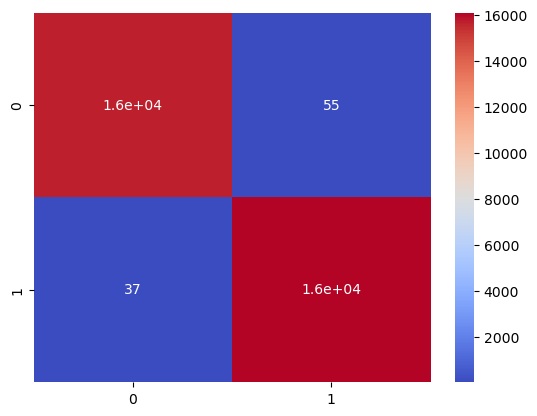

In [101]:
sns.heatmap(confusion_matrix(y_test1,y_pred1),cmap='coolwarm',annot=True)

In [102]:
'''X_train2=pd.concat([pd.DataFrame(y_train1),X_train1],axis=1)
X_test2 = pd.concat([pd.DataFrame(y_pred1,columns=['IS_HCP'],index=y_test1.index),X_test1],axis=1)
y_train2=y_train.drop('IS_HCP',axis=1)
y_test2=y_test.drop('IS_HCP',axis=1)'''

"X_train2=pd.concat([pd.DataFrame(y_train1),X_train1],axis=1)\nX_test2 = pd.concat([pd.DataFrame(y_pred1,columns=['IS_HCP'],index=y_test1.index),X_test1],axis=1)\ny_train2=y_train.drop('IS_HCP',axis=1)\ny_test2=y_test.drop('IS_HCP',axis=1)"

In [103]:
'''FEATURES = df.columns.drop(['TAXONOMY'])
NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(NUMERICAL)'''

"FEATURES = df.columns.drop(['TAXONOMY'])\nNUMERICAL = df[FEATURES].select_dtypes('number').columns\nprint(NUMERICAL)"

In [104]:
'''preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])'''

"preprocessors = ColumnTransformer(transformers=[\n    ('num', numerical_pipe, NUMERICAL),\n    ('cat', categorical_pipe, CATEGORICAL)\n])"

In [105]:
'''pipe2 = Pipeline([
    ('preprocessors', preprocessors),
    ('vc', vc)
])
pipe2.fit(X_train2,y_train2)
y_pred2 = pipe2.predict(X_test2)
y_pred_proba2=pipe2.predict_proba(X_test2)
print(y_pred_proba2)
#X_test=pipe1[0].transform(X_test)
#print(pipe1[1].score(X_test,y_test))
accuracy_score(y_test2,y_pred2)
'''

"pipe2 = Pipeline([\n    ('preprocessors', preprocessors),\n    ('vc', vc)\n])\npipe2.fit(X_train2,y_train2)\ny_pred2 = pipe2.predict(X_test2)\ny_pred_proba2=pipe2.predict_proba(X_test2)\nprint(y_pred_proba2)\n#X_test=pipe1[0].transform(X_test)\n#print(pipe1[1].score(X_test,y_test))\naccuracy_score(y_test2,y_pred2)\n"

In [106]:
##### Total Dataset

In [107]:
TARGET=['IS_HCP']
X=df.drop(columns=['IS_HCP','TAXONOMY'])
y=df[TARGET]

In [108]:
pipe1 = Pipeline([
    ('preprocessors', preprocessors),
    ('vc', vc)
])

In [ ]:
pipe1.fit(X,y)

In [ ]:
import pickle
pickle.dump(pipe1,open('model1and4.pkl','wb'))

In [ ]:
test=pd.read_csv('/kaggle/input/identifying-healthcare/Doceree-HCP_Test.csv')
test.set_index('ID', inplace=True)
test.drop(['CHANNELTYPE','USERZIPCODE','USERPLATFORMUID','BIDREQUESTIP'],inplace=True,axis=1)
test['URL']=test['URL'].str.split("www.").str[1].str.split('.com').str[0]


In [ ]:
token_counts=vectorizer1.transform(test['KEYWORDS'])
word_counts = token_counts.toarray().sum(axis=0)
feature_names = vectorizer1.get_feature_names_out()
w=pd.DataFrame(token_counts.toarray(),index=test.index,columns=feature_names)
test=pd.concat([test,w],axis=1)
test['BROWSER']=test['USERAGENT'].str.findall(r'(Mozilla|AppleWebKit|Version|Mobile|Safari|Edg|Chrome|CriOS|Firefox|GSA|SamsungBrowser|Gecko)')
test['BROWSER']=test['BROWSER'].str.join(' ')
test.BROWSER=np.where(test['BROWSER'].isna(),' ',test['BROWSER'])
token_counts=vectorizer2.transform(test['BROWSER'])
word_counts = token_counts.toarray().sum(axis=0)
feature_names = vectorizer2.get_feature_names_out()
w=pd.DataFrame(token_counts.toarray(),index=test.index,columns=feature_names)
test=pd.concat([test,w],axis=1)
test['PLATFORM_ID']=test['PLATFORM_ID'].astype('str')
test.drop(['USERAGENT','KEYWORDS'],inplace=True,axis=1)
test.columns=test.columns.astype('str')
test

In [ ]:
y_pred=pipe1.predict(test)

In [ ]:
submission=pd.DataFrame(y_pred,index=test.index,columns=['IS_HCP'])
submission.IS_HCP=submission.IS_HCP.astype('int')
submission

In [ ]:
submission.to_csv('/kaggle/working/submission.csv')

In [ ]:
# submission - model1
# submission_1 model1,model9
# submission_2 model1,model9,model10
# submission_3 all models
# submission_4 model4
# submission_5 model1,model4
# submission_6 model1,model4,model8,model9
# submission_7 model4,over sample
# submission_8 model4,callibrated